## Observations and Insights 

3 Oberservations from data
    
    a) There is an extremely high correlation between the weight of the mice and the volume of their tumor being 84%.
    b) Ramicane and Camopulin were the best performing drugs with a mean volume of 40.21mm3 and 40.68mm3 respectively. (This on     the basis that the size of the tumors at the start of the trial were similar sizes)
    c) Following the findings of gender (see df as bottom of file), there is a minor change for the mice depending on their       gender

In [1]:
%matplotlib notebook

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
new_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
# Display the data table for preview
new_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice = new_data["Mouse ID"]
len(mice)

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = new_data[new_data.duplicated(subset=['Mouse ID','Timepoint'], keep = False)]
duplicates[['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
107,g989,0
137,g989,0
329,g989,5
360,g989,5
620,g989,10
681,g989,10
815,g989,15
869,g989,15
950,g989,20
1111,g989,20


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = new_data[new_data.duplicated(subset=['Mouse ID','Timepoint'], keep = False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = new_data[['Mouse ID','Timepoint']].drop_duplicates()
data

,Mouse ID,Timepoint
0,b128,0
1,f932,0
2,g107,0
3,a457,0
4,c819,0
...,...,...
1888,r944,45
1889,u364,45
1890,p438,45
1891,x773,45


In [8]:
# Checking the number of mice in the clean DataFrame.
len(data)

1888

## Summary Statistics

In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
groupby = new_data.groupby(["Drug Regimen"])
mean = pd.DataFrame(groupby["Tumor Volume (mm3)"].mean())
median = pd.DataFrame(groupby["Tumor Volume (mm3)"].median())
varience = pd.DataFrame(groupby["Tumor Volume (mm3)"].var())
std_dev = pd.DataFrame(groupby["Tumor Volume (mm3)"].std()) 
sem = pd.DataFrame(groupby["Tumor Volume (mm3)"].sem())

frame = [mean, median, varience, std_dev, sem]
result = pd.concat(frame, keys = ['Mean', 'Median', 'Varience', 'Standard Devation', 'SEM'], axis = 1).round(3)
result





,Mean,Median,Varience,Standard Devation,SEM
,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321


In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

drug_group_stats = new_data.groupby('Drug Regimen').agg(
        mean=('Tumor Volume (mm3)', np.mean),
        median=('Tumor Volume (mm3)', np.median),
        var=('Tumor Volume (mm3)', np.var),
        std_dev=('Tumor Volume (mm3)', np.std),
        sem=('Tumor Volume (mm3)', st.sem)
).round(3)

drug_group_stats

C:\Users\ashdr\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\ashdr\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\ashdr\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

<IPython.core.display.Javascript object>


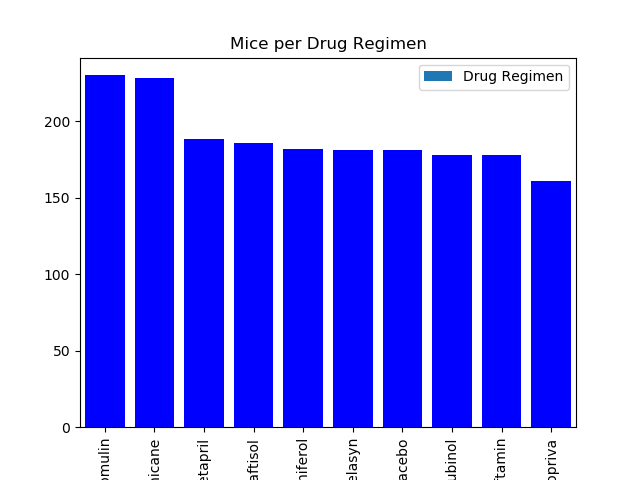

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_per_treatment = new_data['Drug Regimen'].value_counts()
mice = pd.DataFrame(mice_per_treatment)
mice.plot(kind= 'bar', title = "Mice per Drug Regimen") 

<IPython.core.display.Javascript object>


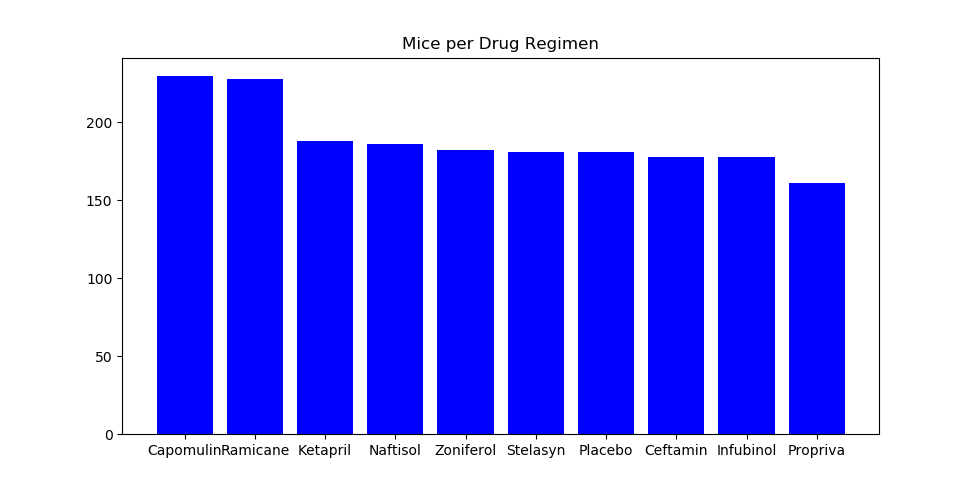

<BarContainer object of 10 artists>

In [66]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin",
          "Infubinol", "Propriva"]
y_axis = mice_per_treatment 
plt.title("Mice per Drug Regimen")

plt.bar(x_axis, y_axis, color = 'blue', align = 'center')

<IPython.core.display.Javascript object>


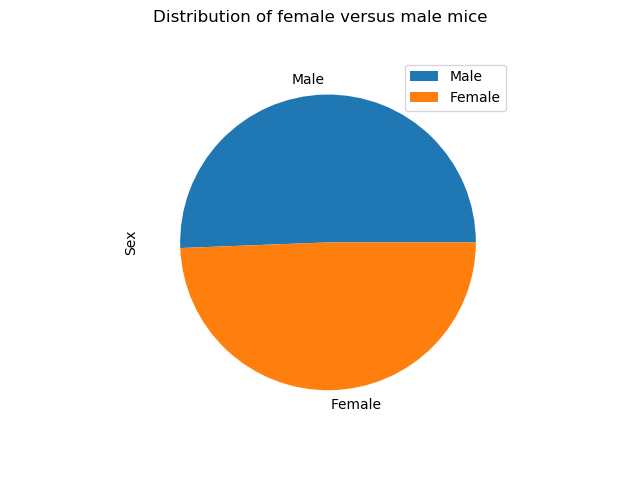

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000217691F9248>],
      dtype=object)

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = pd.DataFrame(new_data['Sex'].value_counts())
gender.plot(kind = 'pie', subplots = True, title="Distribution of female versus male mice")

<IPython.core.display.Javascript object>


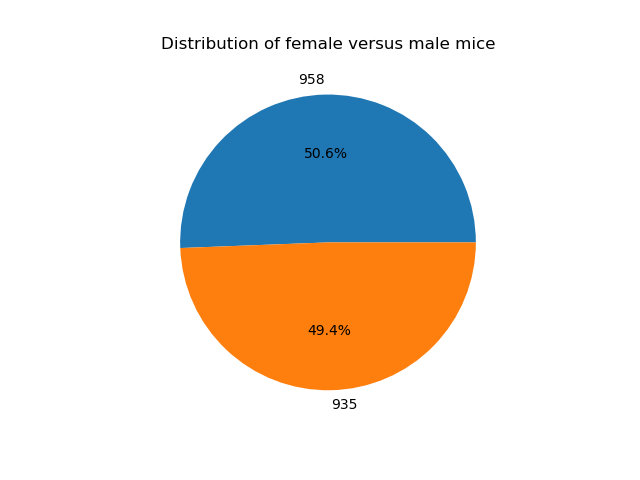

C:\Users\ashdr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Distribution of female versus male mice')

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels= new_data['Sex'].value_counts(), autopct="%1.1f%%")
plt.title("Distribution of female versus male mice")

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = new_data[new_data['Drug Regimen'].isin(four_drug_list)]
four_drugs
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_plotting = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = new_data.loc[new_data['Drug Regimen'] == 'Capomulin']
cap_df
cap_plot= cap_df[['Timepoint', 'Drug Regimen']]
cap_plot

,Timepoint,Drug Regimen
0,0,Capomulin
226,0,Capomulin
227,0,Capomulin
228,0,Capomulin
229,0,Capomulin
...,...,...
1854,45,Capomulin
1859,45,Capomulin
1878,45,Capomulin
1888,45,Capomulin


<IPython.core.display.Javascript object>


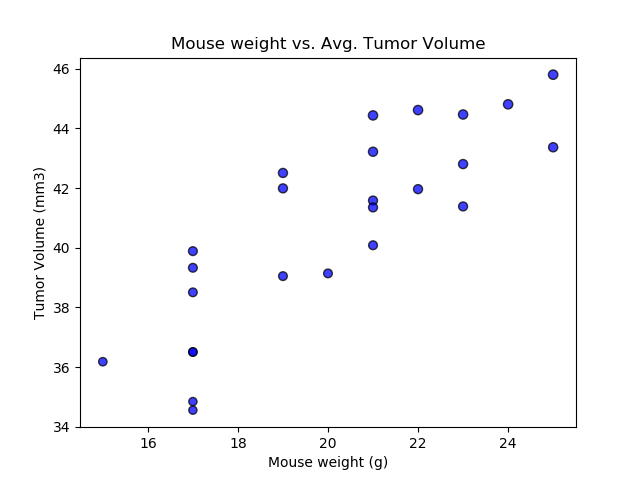

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouse_id = cap_df.groupby(['Mouse ID']).agg(
        Mouse_weight=('Weight (g)', np.mean),
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)).round(3)

plt.scatter(
    cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'],
    marker='o', facecolors='b', edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'], alpha=.75)

plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

<IPython.core.display.Javascript object>


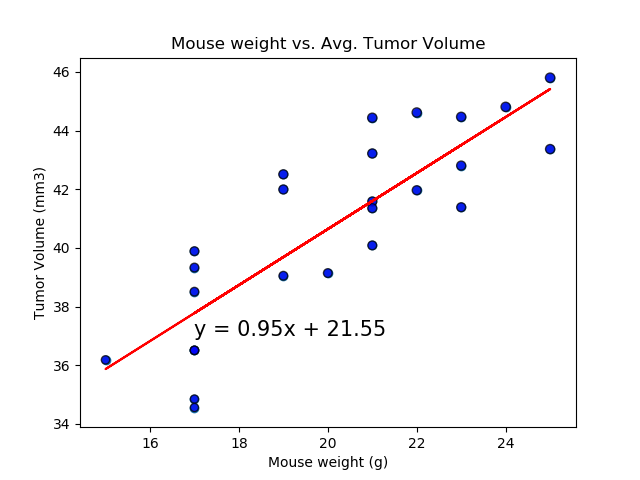

The correlation coefficient between mouse weight and average tumor volume is 0.8419461020261076


In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")

correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]}")

# Observation C

In [111]:

drug_group_stats = new_data.groupby('Sex').agg(
        mean=('Tumor Volume (mm3)', np.mean),
        median=('Tumor Volume (mm3)', np.median),
        var=('Tumor Volume (mm3)', np.var),
        std_dev=('Tumor Volume (mm3)', np.std),
        sem=('Tumor Volume (mm3)', st.sem)
).round(3)

drug_group_stats

C:\Users\ashdr\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\ashdr\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\ashdr\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std_dev,sem
Sex,,,,,
Female,51.101,49.413,77.371,8.796,0.288
Male,49.812,48.450,80.081,8.949,0.289
